<a href="https://colab.research.google.com/github/Pilla-Divya-Vidhyasree/NeuroNexus/blob/main/SMS%2Cemail_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING REQUIRED PACKAGES**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk

In [3]:
df = pd.read_csv('/content/spam.csv', encoding = 'ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
df = df.iloc[:,:2]

In [6]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [7]:
col_replace ={
    'v1':'label',
    'v2':'text'
}

In [8]:
df.rename(columns=col_replace, inplace=True)
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df['label'].value_counts()*100/df['label'].shape

ham     86.593683
spam    13.406317
Name: label, dtype: float64

**DATA CLEANING(NORMALISATION)**

In [10]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])
df.head(10)

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [11]:
df.duplicated().sum()

403

In [12]:
df =df.drop_duplicates(keep='first')

<Axes: xlabel='label', ylabel='count'>

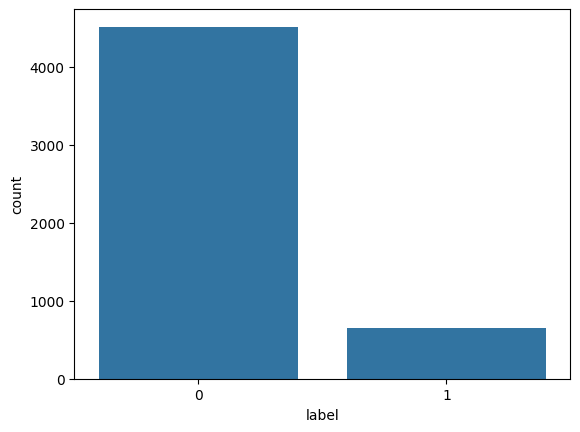

In [13]:
sns.countplot(x='label', data=df)

In [14]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [15]:
df['number_of_characters'] = df['text'].apply(lambda x:len(x))

df['number_of_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

df['number_of_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [16]:
df.head()

,label,text,number_of_characters,number_of_words,number_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


<Axes: xlabel='number_of_characters', ylabel='Count'>

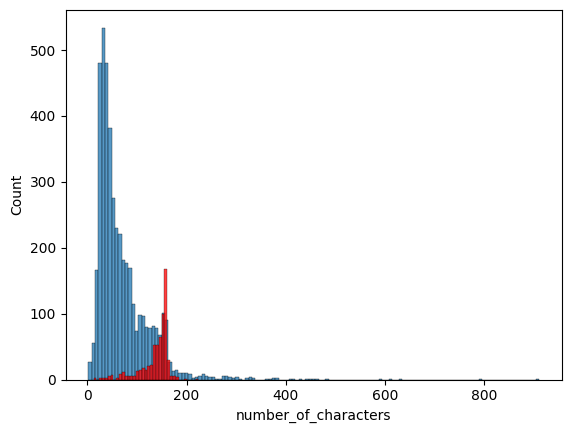

In [17]:
import matplotlib.pyplot as plt

plt.figure()
sns.histplot(data=df[df['label'] == 0] , x='number_of_characters')
sns.histplot(data=df[df['label'] == 1], x='number_of_characters', color='red')

<Axes: xlabel='number_of_words', ylabel='Count'>

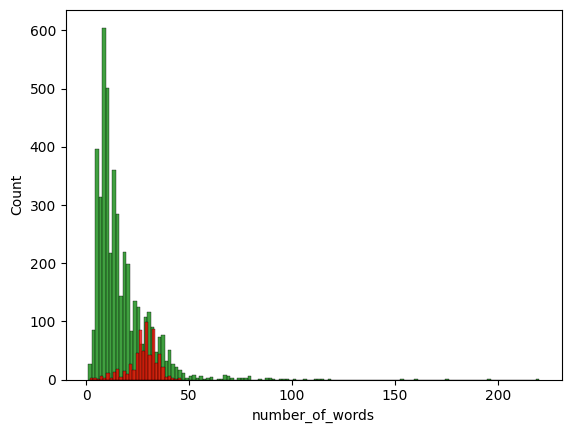

In [18]:
import matplotlib.pyplot as plt

plt.figure()
sns.histplot(data = df[df['label'] == 0], x= 'number_of_words', color = 'green')
sns.histplot(data = df[df['label'] == 1], x = 'number_of_words', color = 'red')

In [24]:
df

,label,text,number_of_characters,number_of_words,number_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [39]:
x = df[['text', 'number_of_characters','number_of_words', 'number_of_sentences']]
y = df['label']
df.describe()

,label,number_of_characters,number_of_words,number_of_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [35]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

**CREATING ,TRAINING AND TESTING MODEL**

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [43]:
from sklearn.metrics import accuracy_score, precision_score

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Separate numerical and text columns
text_columns = ['text']
numerical_columns = ['number_of_characters', 'number_of_words', 'number_of_sentences']

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(), 'text'),
        ('numerical', SimpleImputer(strategy='mean'), numerical_columns)
    ])

# Update the pipeline for each model
models = {
    'lr': LogisticRegression(),
    'svc': SVC(kernel='sigmoid', gamma=1.0),
    'rf': RandomForestClassifier(n_estimators=10),
    'tree': DecisionTreeClassifier()
}

empty_list = []

for key, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        (key, model)
    ])

    pipeline.fit(x_train, y_train)
    pred = pipeline.predict(x_test)
    acc = accuracy_score(pred, y_test)
    prec = precision_score(pred, y_test)
    val = [acc, prec]
    empty_list.append(val)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
empty_list

[[0.9632495164410058, 0.7872340425531915],
 [0.8636363636363636, 0.0],
 [0.9700193423597679, 0.7801418439716312],
 [0.9632495164410058, 0.7801418439716312]]

**It seems like Logistic Regression model is accurately performing on both training set and testing data**

In [46]:
regressor = empty_list[2]

In [47]:
regressor

[0.9700193423597679, 0.7801418439716312]

In [48]:
#Logistic_regressor accuracy
regressor[0]

0.9700193423597679